In [283]:
import scanpy as sc
import pandas as pd
from cellbender.remove_background.downstream import anndata_from_h5
adata_pl=sc.read_10x_h5("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/run2/output_filtered.h5")
adata_pl=anndata_from_h5("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/run2/output.h5")

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [274]:
adata_pl

AnnData object with n_obs × n_vars = 18790 × 65597
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed'
    uns: 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'

In [284]:
mapper=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/aPlwal.pri.V2.genome.annots.tsv")
mapper_dict = mapper.set_index('#gene_id')['EggNM.Preferred_name'].to_dict()

new_var_names_pl = []  # Create an empty list to store the updated variable names

# Iterate through each gene_id in the mapper_dict
for gene_id in adata_pl.var_names:
    # Check if the gene_id exists in adata_pl.var_names and if its mapping is not '.'
    if gene_id in mapper_dict.keys() and mapper_dict[gene_id] != '.':
        # Debugging: Print gene_id and its mapping
        print(f"Updating: {gene_id} -> {mapper_dict[gene_id]}")
        # If conditions are met, append the mapped gene_id to new_var_names_pl
        new_var_names_pl.append(mapper_dict[gene_id])
    else:
        # Debugging: Print gene_id that's not updated
        print(f"Not Updating: {gene_id}")
        # If conditions are not met, append the original gene_id to new_var_names_pl
        new_var_names_pl.append(gene_id)

# Update the variable names of adata_pl with the new_var_names_pl list
adata_pl.var_names = new_var_names_pl

Not Updating: POL3
Not Updating: gene26597
Not Updating: gene26598
Not Updating: SPX2
Not Updating: gene26599
Not Updating: gene26600
Not Updating: gene26601
Not Updating: gene26602
Updating: gene26603 -> PKNOX2
Not Updating: POL
Not Updating: gene26605
Not Updating: MYPOP
Not Updating: RTXE
Not Updating: HARB1
Not Updating: MYPOP
Not Updating: gene26610
Not Updating: gene26611
Not Updating: LIN1
Not Updating: POL
Not Updating: MYPOP
Not Updating: HARB1
Not Updating: RL23
Not Updating: gene26617
Not Updating: LORF2
Not Updating: gene26619
Not Updating: gene26620
Not Updating: gene26621
Not Updating: PGBD4
Not Updating: gene26623
Not Updating: gene26624
Not Updating: POL
Not Updating: gene26626
Not Updating: POL4
Not Updating: gene26628
Not Updating: gene26629
Not Updating: gene26630
Not Updating: LORF2
Not Updating: ZN583
Not Updating: PGBD4
Not Updating: PGBD4
Not Updating: SIAE
Not Updating: gene26636
Not Updating: gene26637
Not Updating: POL4
Not Updating: gene26639
Not Updating: PO

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


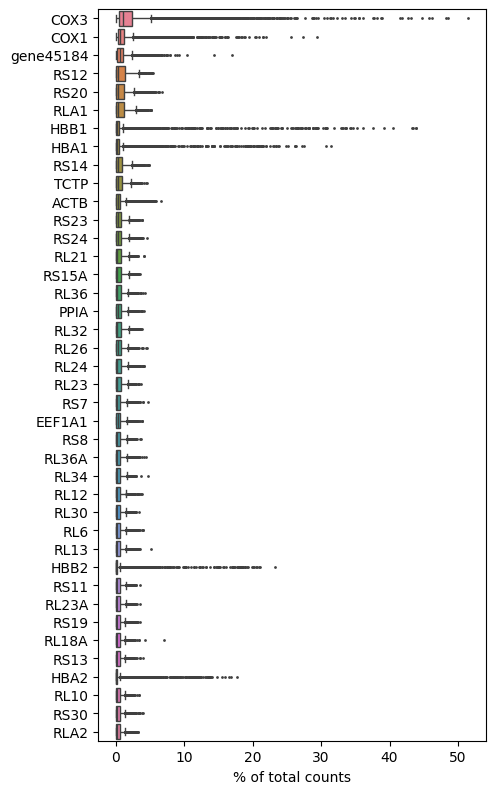

In [285]:
import numpy as np
sc.pl.highest_expr_genes(adata_pl, n_top=40,)

In [286]:
#Preprocessing
import re
sc.pp.filter_cells(adata_pl, min_genes=200)
sc.pp.filter_genes(adata_pl, min_cells=3)
adata_pl.var['mt']=adata_pl.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_pl, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata_pl = adata_pl[adata_pl.obs.pct_counts_mt < 5, :]
adata_pl=adata_pl[adata_pl.obs.n_genes_by_counts < 2500, :]
#Removing the mt genes
# Patterns for gene names to remove
patterns_to_remove = ['COX1', 'COX2', 'ATP8', 'ATP6', 'COX3', 'NU1M', 'NU2M', 'NU3M', 'NU4M', 'NU4LM', 'NU5M', 'NU6M', 'CYB']

# Create a regular expression pattern by joining the patterns with the '|' (OR) operator
gene_pattern = '|'.join(patterns_to_remove)

# Use the regex pattern to filter and remove genes
adata_pl = adata_pl[:, ~adata_pl.var_names.str.contains(gene_pattern, regex=True)]

# The resulting 'adata_pl' will now exclude genes that match the specified patterns

#blood_related_genes=['HBA1', 'HBA2', 'HBB1', 'HBB2', 'HBA3', 'HBS1L']
#Filtering out the blood related genes
#adata_pl = adata_pl[:, ~adata_pl.var_names.isin(blood_related_genes)]
adata_pl.var_names_make_unique()

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/a

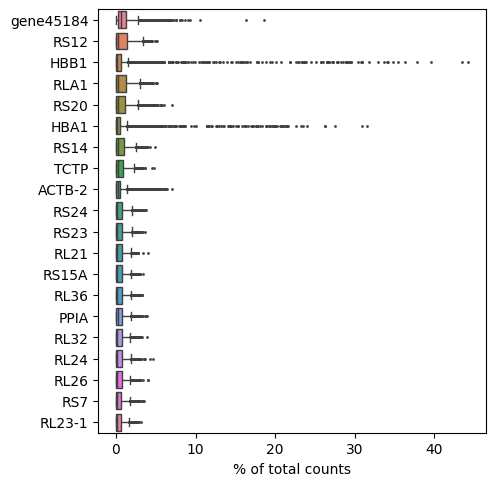

In [287]:
sc.pl.highest_expr_genes(adata_pl, n_top=20,)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


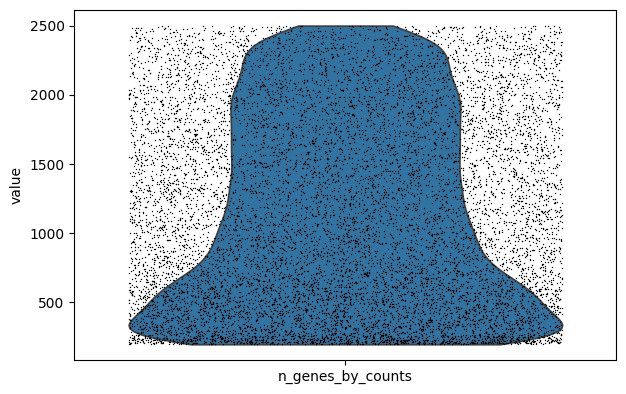

In [288]:
sc.pl.violin(adata_pl, ['n_genes_by_counts'],jitter=0.4)

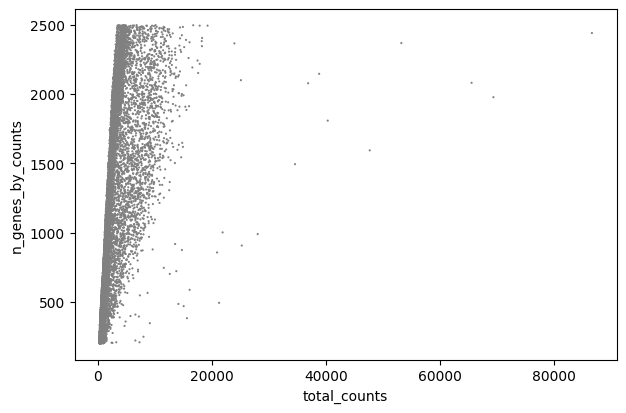

In [289]:
sc.pl.scatter(adata_pl, x='total_counts', y='n_genes_by_counts')

In [290]:
#Processing the data
sc.pp.normalize_total(adata_pl, target_sum=1e4)
sc.pp.log1p(adata_pl)
sc.pp.highly_variable_genes(adata_pl, min_mean=0.0125, max_mean=3, min_disp=0.5)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


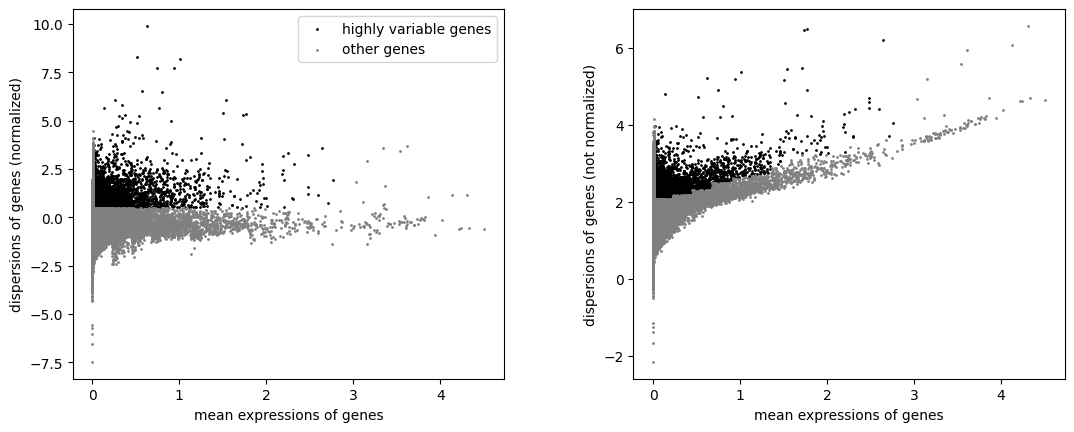

In [291]:
sc.pl.highly_variable_genes(adata_pl)

In [292]:
sc.pp.scale(adata_pl, max_value=10)

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


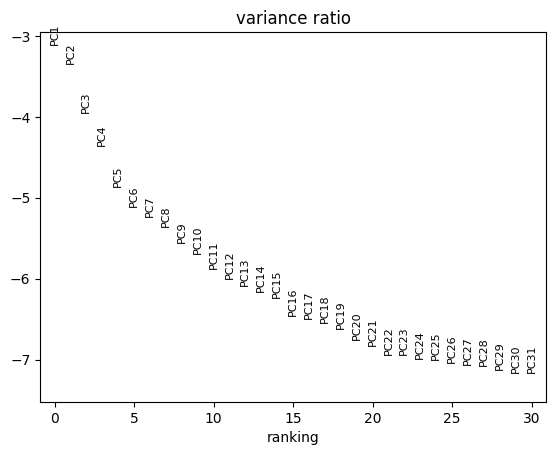

In [293]:
#PCA and UMAP
sc.tl.pca(adata_pl, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_pl, log=True)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


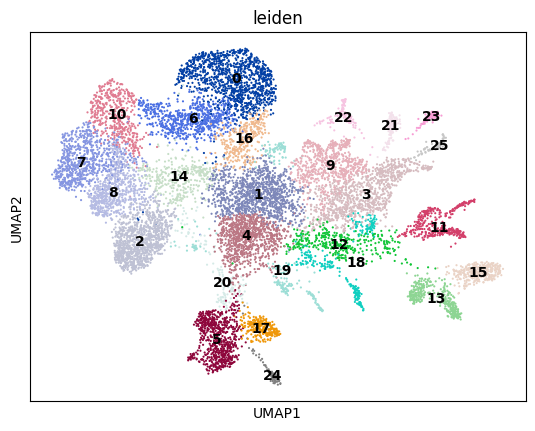

In [301]:
sc.pp.neighbors(adata_pl, n_neighbors=30, n_pcs=30)
sc.tl.umap(adata_pl)
sc.tl.leiden(adata_pl, resolution=1)
sc.pl.umap(adata_pl, color=['leiden'], legend_loc='on data')

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


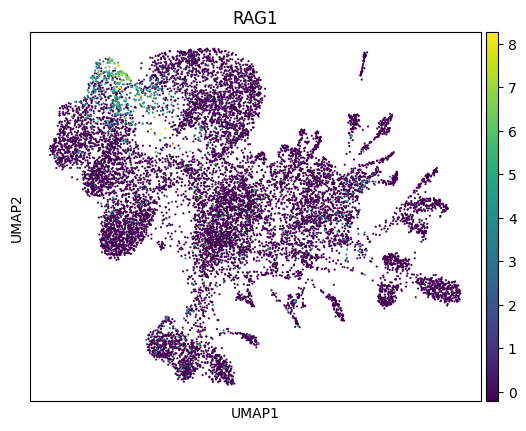

In [297]:
sc.pl.umap(adata_pl,color="RAG1")

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


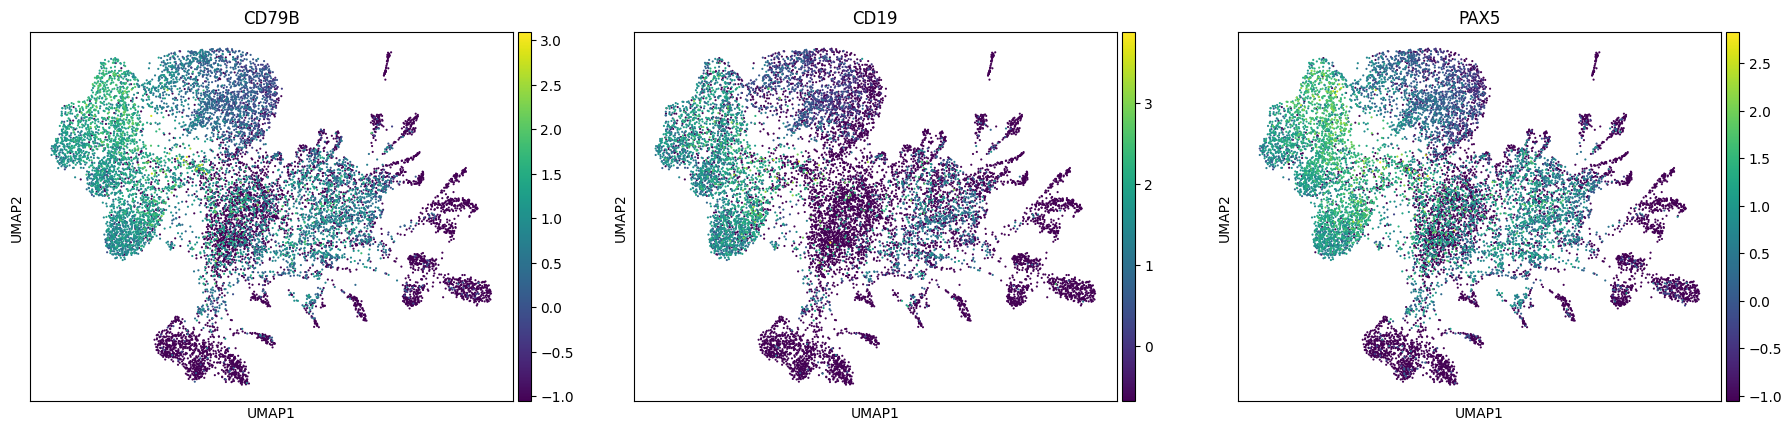

In [296]:
sc.pl.umap(adata_pl,color=["CD79B","CD19","PAX5"])

In [265]:
for i in adata_pl.var_names:
    if i.startswith("CD2"):
        print(i)

CD276
CD20B
CD28
CD226
CD2AP
CD2B2
CD22
CD22-1
CD2
CD276-1
CD247
CD209


/home/nikvaku/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_group

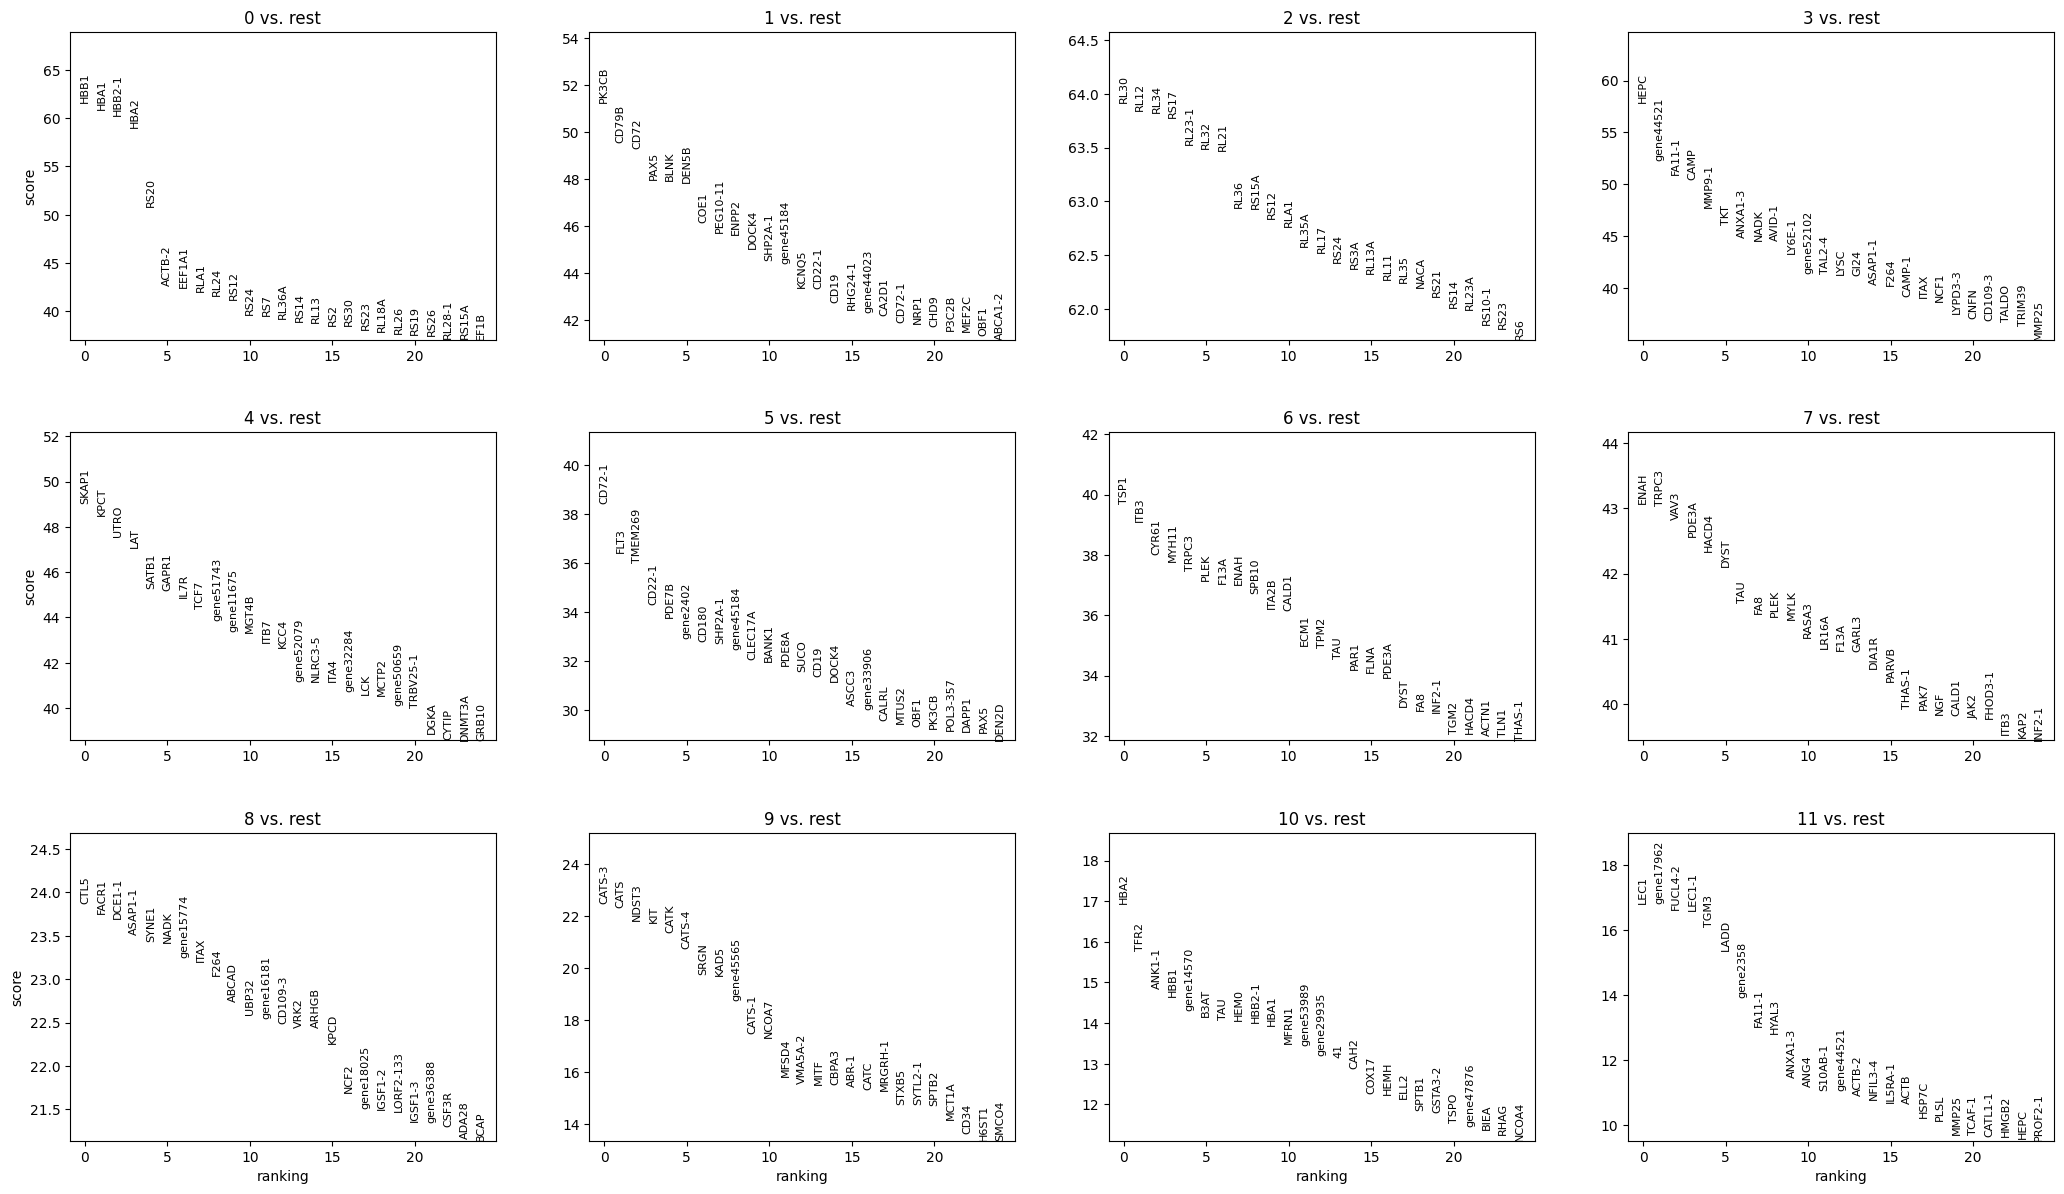

In [197]:
#Perform differential expression analysis
sc.tl.rank_genes_groups(adata_pl, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_pl, n_genes=25, sharey=False)

In [117]:
#Save the object
#adata_pl_sub.write_h5ad("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/adata_pl_run2.h5ad")

In [118]:
#leiden=adata_pl.obs['leiden']

In [119]:
#leiden

In [120]:
#adata_pl.obs['leiden']=leiden

In [121]:
#adata_pl.obs['leiden']

In [122]:
#adata_pl.obs.index

In [123]:
#Subsetting the data
#cells=adata_pl.obs.index
#leiden=adata_pl.obs['leiden']
#adata_pl_sub=adata_pl[cells]

In [124]:
#adata_pl_sub

In [125]:
#adata_pl_sub=adata_pl[cells]
#adata_pl_sub.obs['leiden']=leiden

In [126]:
#adata_pl_sub.obs['leiden']

In [127]:
#make variable names unique
#adata_pl_sub.var_names_make_unique()

In [302]:
#Import souporcell data
spleen_souporcell=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nick/Pleuro/outs/20230704_spleen_R1_soup/20230603_24h_soup_res/clusters.tsv")

In [306]:
spleen_souporcell_singlet=spleen_souporcell[spleen_souporcell['status']=='singlet']

In [304]:
spleen_souporcell['status'].value_counts()

status
singlet       20694
doublet       10291
unassigned     2590
Name: count, dtype: int64

In [307]:
spleen_souporcell_singlet

,barcode,status,assignment,singlet_posterior,doublet_posterior,log_prob_singleton,log_prob_doublet,cluster0,cluster1,cluster2
0,AAACCCAAGACGCTCC-1,singlet,0,1.000000,0.000000,-301.963147,-376.527277,-301.963147,-583.471541,-693.971984
1,AAACCCAAGATCCTAC-1,singlet,1,1.000000,0.000000,-2112.379393,-3023.262770,-4540.653961,-2112.379393,-5531.126940
2,AAACCCAAGCCGCACT-1,singlet,0,1.000000,0.052198,-108.464387,-111.363483,-108.464387,-140.623852,-155.179660
4,AAACCCAAGCTTTCTT-1,singlet,0,1.000000,0.019293,-148.872530,-152.801065,-148.872530,-187.814607,-197.468175
6,AAACCCAAGGCATCTT-1,singlet,0,1.000000,0.025269,-162.377212,-166.029784,-162.377212,-204.532057,-226.069223
...,...,...,...,...,...,...,...,...,...,...
33570,TTTGTTGTCCTTATCA-1,singlet,1,1.000000,0.000000,-473.396573,-685.476398,-1157.135002,-473.396573,-1210.150476
33571,TTTGTTGTCGTGTGAT-1,singlet,0,1.000000,0.024682,-67.755812,-71.432507,-67.755812,-110.078380,-100.316988
33572,TTTGTTGTCTAATTCC-1,singlet,0,0.999999,0.007775,-62.902947,-67.752006,-62.902947,-87.334812,-95.160920
33573,TTTGTTGTCTACGGTA-1,singlet,0,1.000000,0.000000,-1194.160338,-1295.779415,-1194.160338,-1906.001378,-1879.515143


AnnData object with n_obs × n_vars = 12501 × 37101
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'